In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, random, partial, lax

import context
from models.PMF.pmf_model import logprior, loglikelihood
from models.PMF.util import R_train, R_test, init_params
from util import flatten_param_list

from samplers.timed_sampler import timed_sampler_factory

from sgmcmcjax.kernels import build_sgld_kernel, build_sgldCV_kernel, build_sghmc_kernel, build_badodab_kernel, build_baoab_kernel


# PMF

In [10]:

batch_size = int(0.1*R_train.shape[0])
data = (R_train, )

## timed sampler

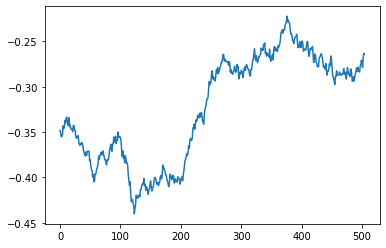

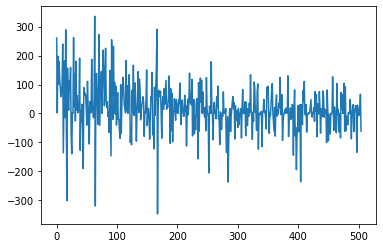

In [11]:
my_timed_sampler = timed_sampler_factory(*build_sgld_kernel(1e-5, 
                        loglikelihood, logprior, data, batch_size))

key = random.PRNGKey(0)
key, subkey = random.split(key)
params_IC = init_params(subkey)

samples, mygrads = my_timed_sampler(key, 1, params_IC)
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()


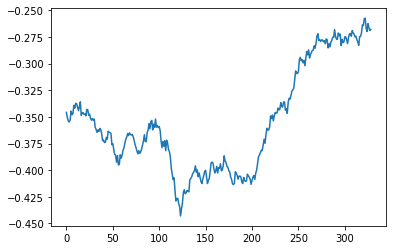

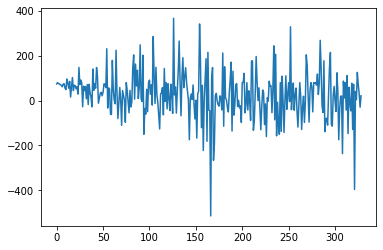

In [13]:
my_timed_sampler = timed_sampler_factory(*build_sgldCV_kernel(1e-5, 
                             loglikelihood, logprior, data, batch_size, params_IC))


key = random.PRNGKey(0)
key, subkey = random.split(key)
params_IC = init_params(subkey)

samples, mygrads = my_timed_sampler(key, 1, params_IC)
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()



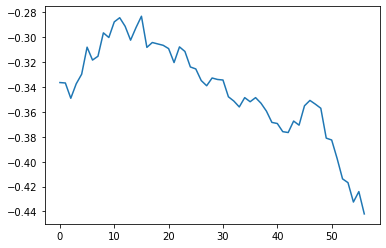

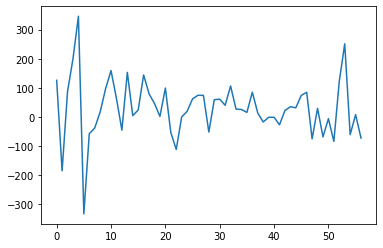

In [21]:
my_timed_sampler = timed_sampler_factory(*build_sghmc_kernel(1e-6, 10, 
                             loglikelihood, logprior, data, batch_size))



key = random.PRNGKey(0)
key, subkey = random.split(key)
params_IC = init_params(subkey)

samples, mygrads = my_timed_sampler(key, 1, params_IC)
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()



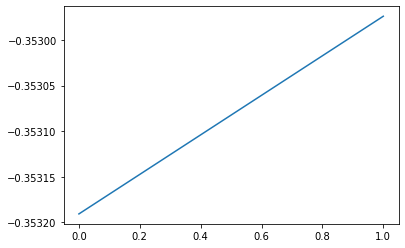

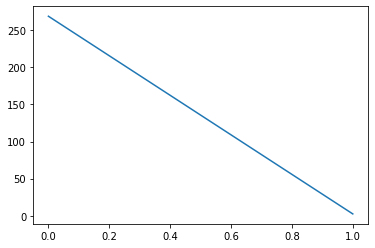

In [17]:
my_timed_sampler = timed_sampler_factory(*build_badodab_kernel(1e-3, 
                             loglikelihood, logprior, data, batch_size))


key = random.PRNGKey(0)
key, subkey = random.split(key)
params_IC = init_params(subkey)

samples, mygrads = my_timed_sampler(key, 4, params_IC)
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()

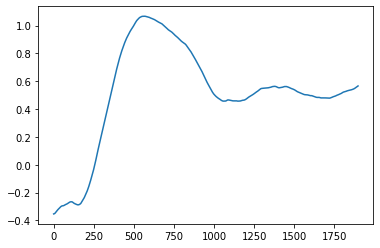

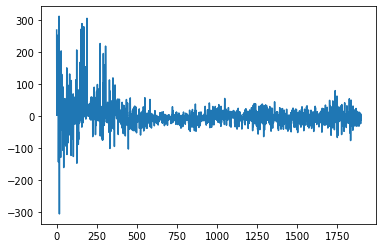

In [16]:
my_timed_sampler = timed_sampler_factory(*build_baoab_kernel(1e-3, 5,
                             loglikelihood, logprior, data, batch_size))


key = random.PRNGKey(0)
key, subkey = random.split(key)
params_IC = init_params(subkey)

samples, mygrads = my_timed_sampler(key, 4, params_IC)
samples = flatten_param_list(samples)
mygrads = flatten_param_list(mygrads)

idx = 7
plt.plot(np.array(samples)[:, idx])
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.show()